In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv("/kaggle/input/time-series-melbourn/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])
data["Temp"] = pd.to_numeric(data["Temp"], errors='coerce')
data = data.dropna()

# Convert Date → numeric index for regression
data["t"] = np.arange(len(data))


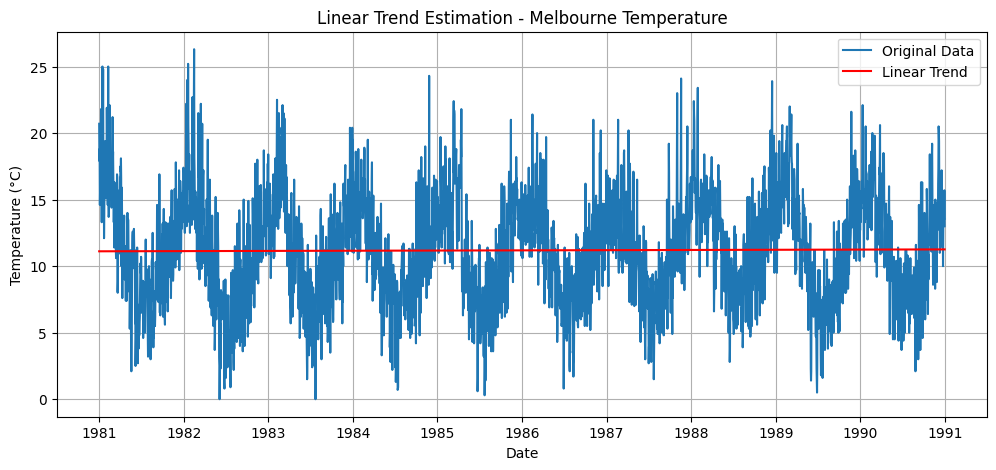

In [3]:

X = data[["t"]]
y = data["Temp"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# Predicted trend line
data["linear_trend"] = linear_model.predict(X)

# Plot
plt.figure(figsize=(12,5))
plt.plot(data["Date"], data["Temp"], label="Original Data")
plt.plot(data["Date"], data["linear_trend"], color='red', label="Linear Trend")
plt.title("Linear Trend Estimation - Melbourne Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


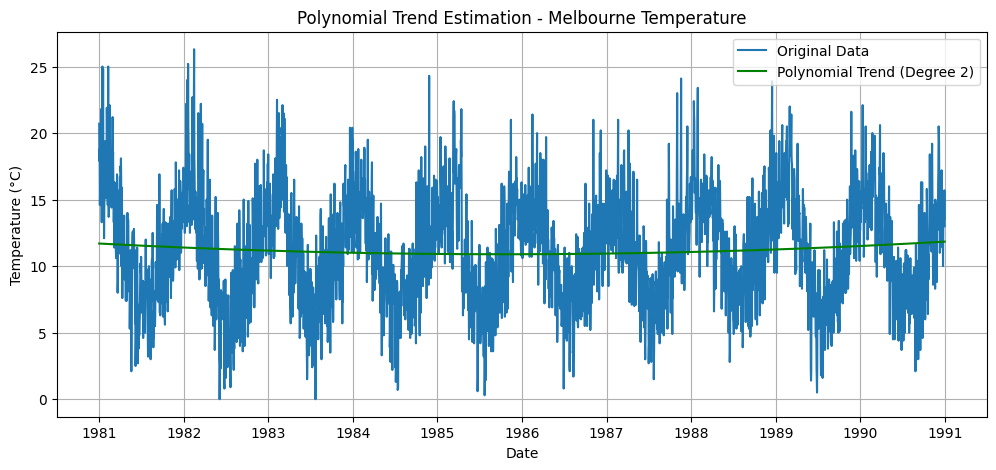

In [4]:
# Polynomial Trend (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[["t"]])

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predicted polynomial trend
data["poly_trend"] = poly_model.predict(X_poly)

# Plot
plt.figure(figsize=(12,5))
plt.plot(data["Date"], data["Temp"], label="Original Data")
plt.plot(data["Date"], data["poly_trend"], color='green', label="Polynomial Trend (Degree 2)")
plt.title("Polynomial Trend Estimation - Melbourne Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
ex3

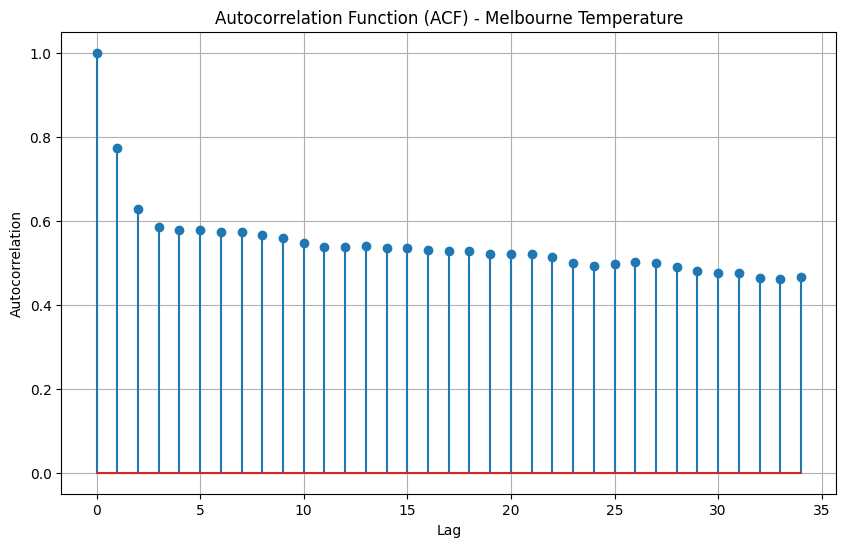

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Melbourne dataset
data = pd.read_csv("/kaggle/input/time-series-melbourn/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])
data["Temp"] = pd.to_numeric(data["Temp"], errors='coerce')
data = data.dropna()

# Use only temperature values
time_series_data = data["Temp"].values

# Length
N = len(time_series_data)

# Lags (0–34)
lags = range(min(35, N // 2))

# Empty list
autocorr_values = []

# Mean & Variance
mean_data = np.mean(time_series_data)
variance_data = np.var(time_series_data)

# Calculate ACF manually
for lag in lags:
    if lag == 0:
        autocorr_values.append(1)  # ACF at lag 0 is 1
    else:
        auto_cov = np.sum((time_series_data[:-lag] - mean_data) *
                          (time_series_data[lag:] - mean_data)) / N
        autocorr_values.append(auto_cov / variance_data)

# Plot ACF
plt.figure(figsize=(10, 6))
plt.stem(lags, autocorr_values)   # FIXED (removed use_line_collection)
plt.title('Autocorrelation Function (ACF) - Melbourne Temperature')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()